In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif


In [14]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'MAX'])

In [18]:

url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Census%20Income/Census%20Income.csv"
df = pd.read_csv(url)



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
df.shape

(32560, 15)

In [22]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [23]:
for i in df.columns:
    print(df[i].value_counts())
    print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

<Figure size 1400x800 with 0 Axes>

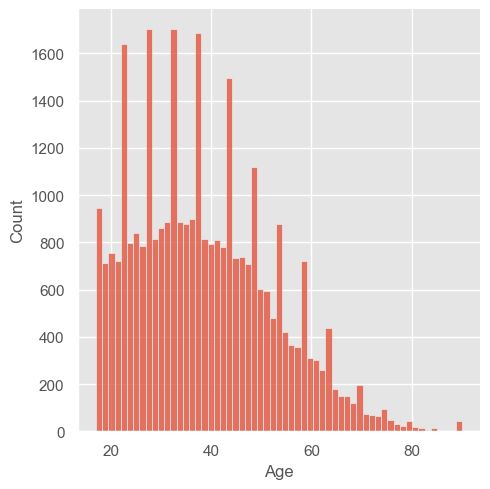

<Figure size 1400x800 with 0 Axes>

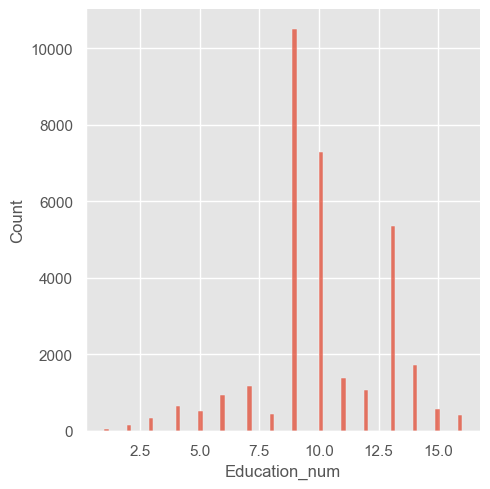

<Figure size 1400x800 with 0 Axes>

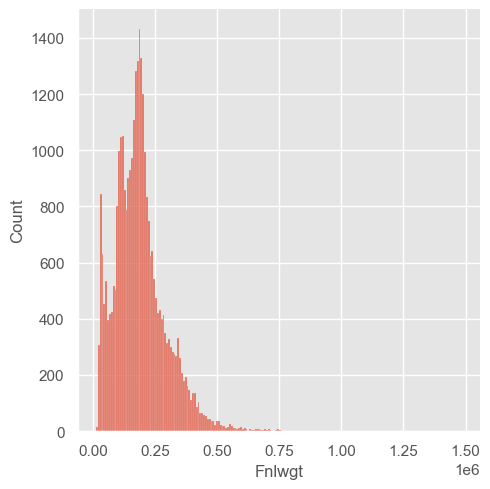

<Figure size 1400x800 with 0 Axes>

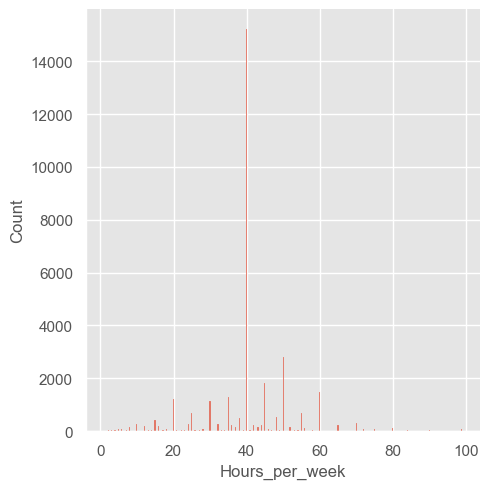

In [28]:
for i in num.columns.difference(['Capital_loss','Capital_gain']):
    plt.figure(figsize=(14,8))
    sns.displot(df[i])
    plt.show()

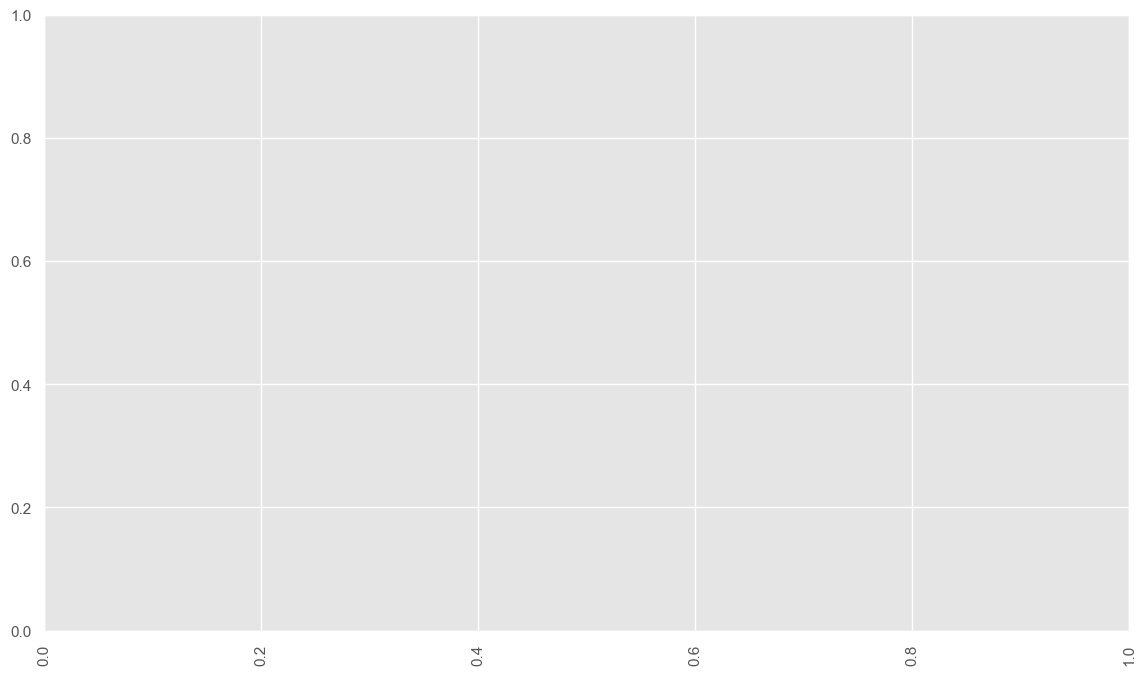

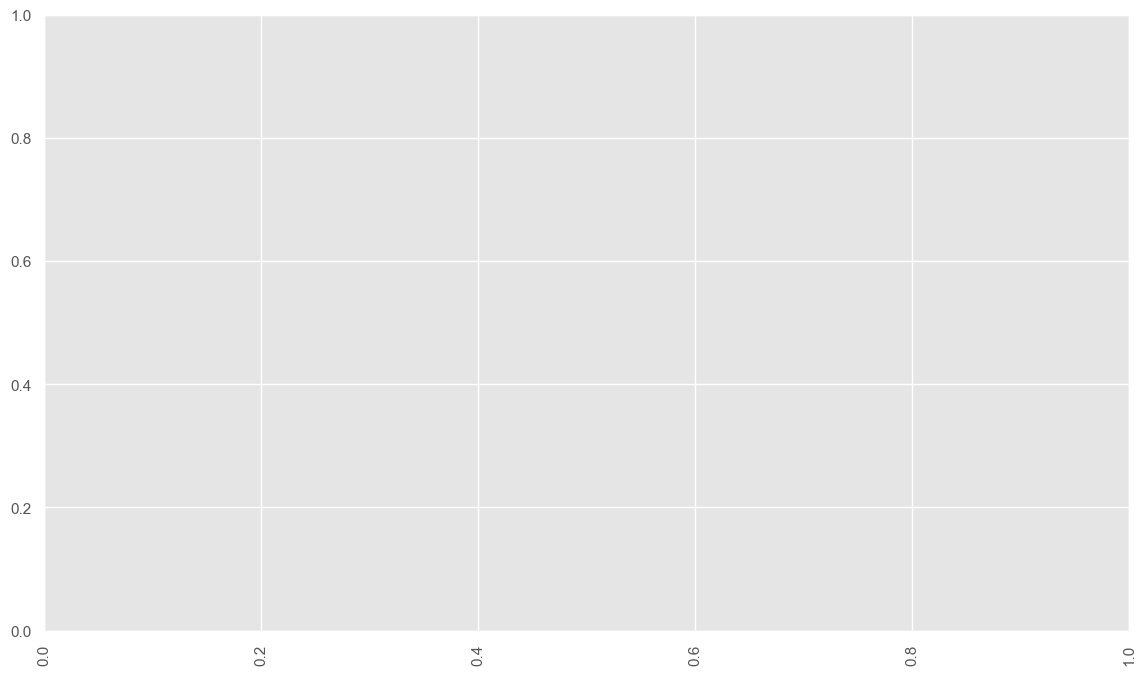

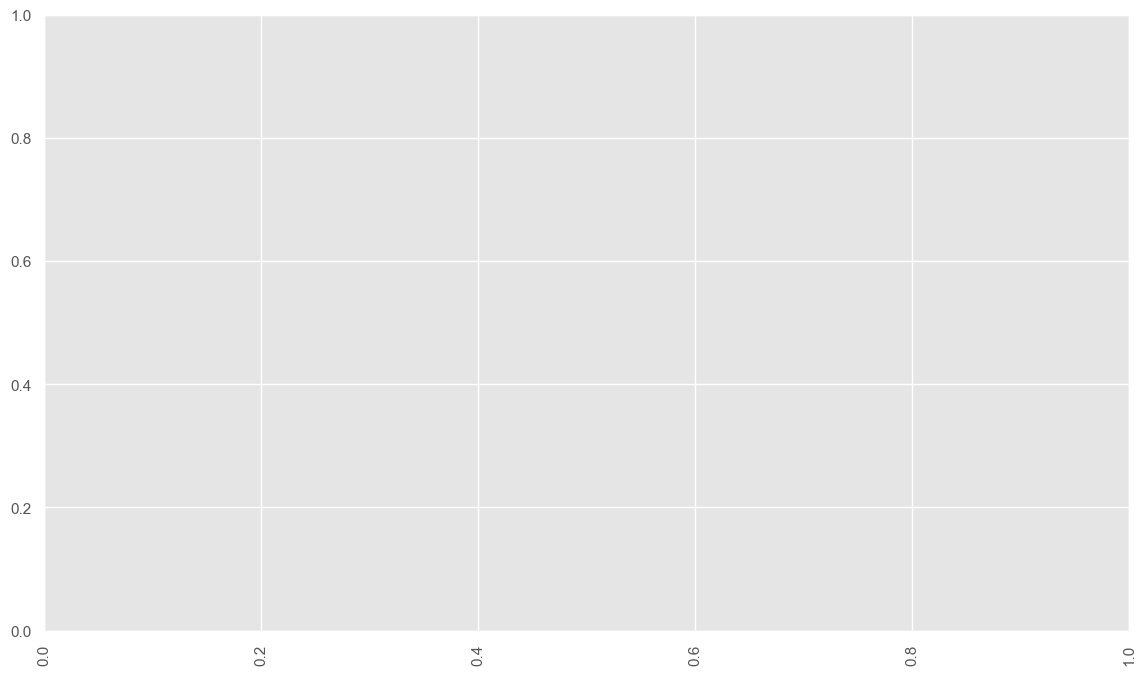

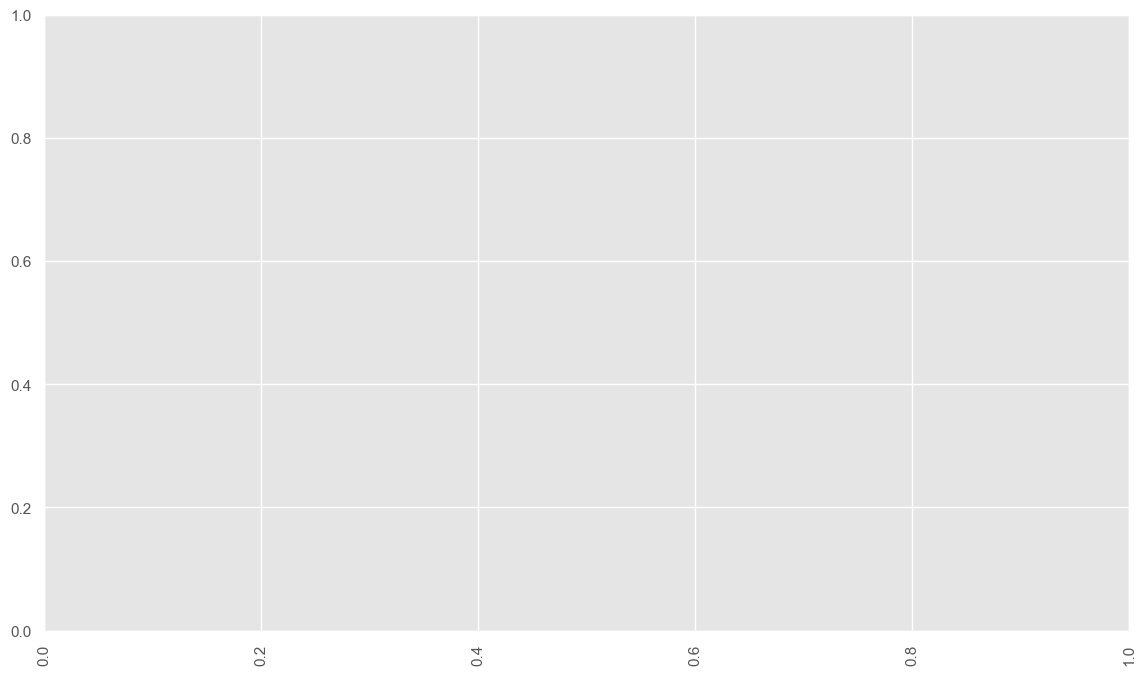

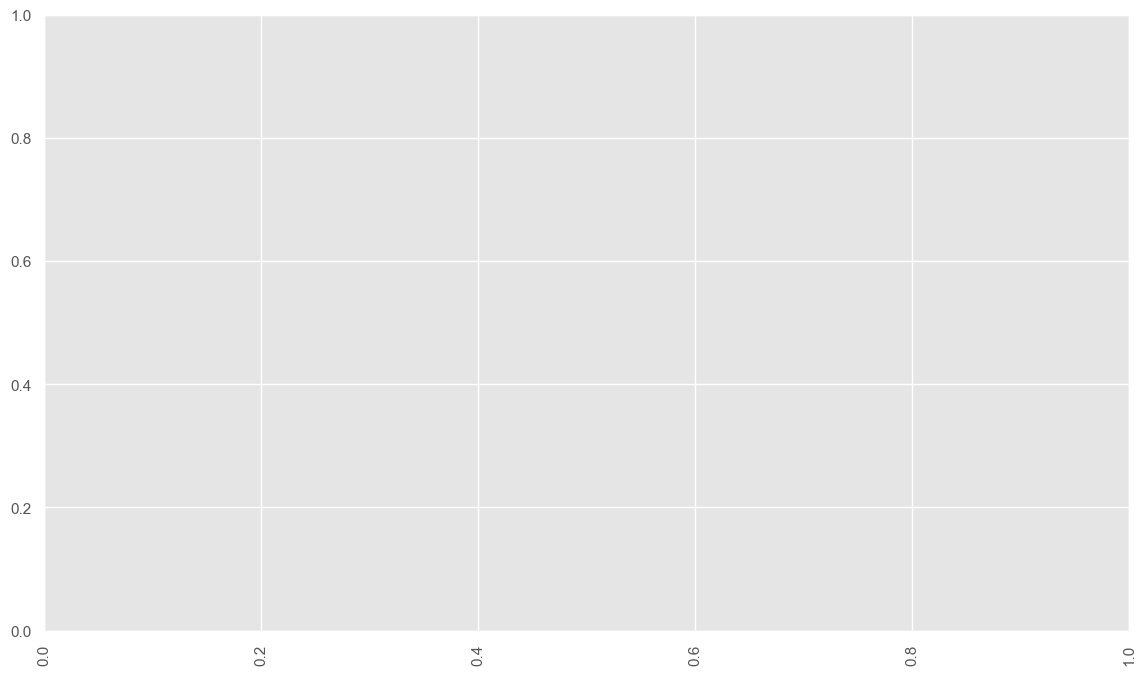

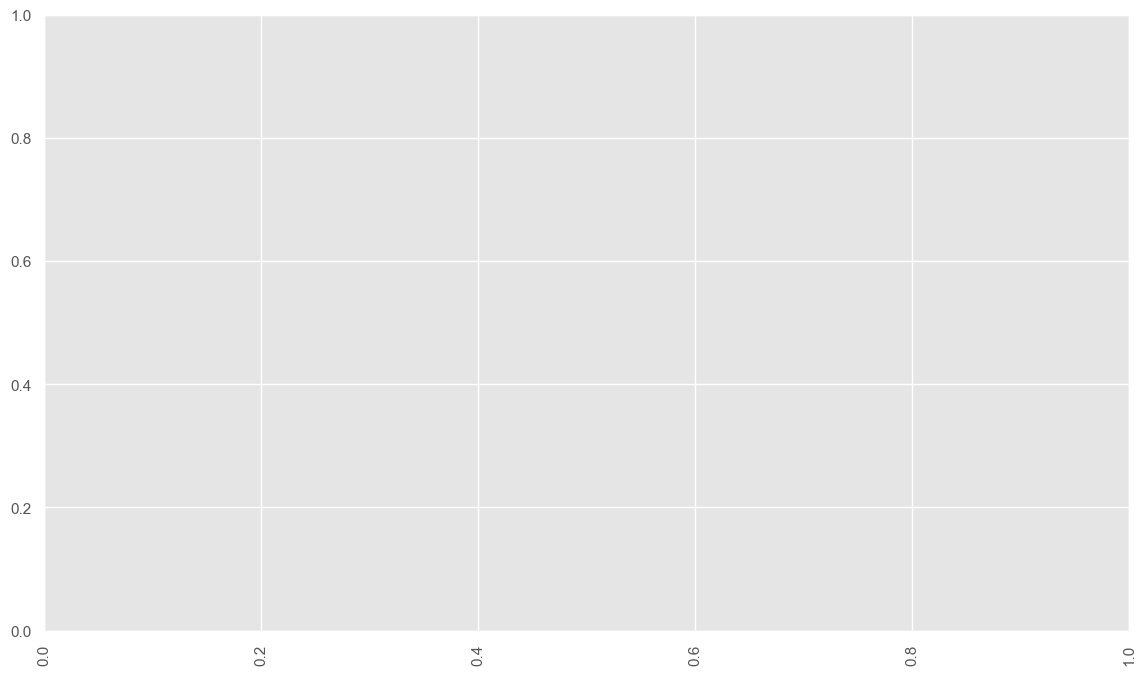

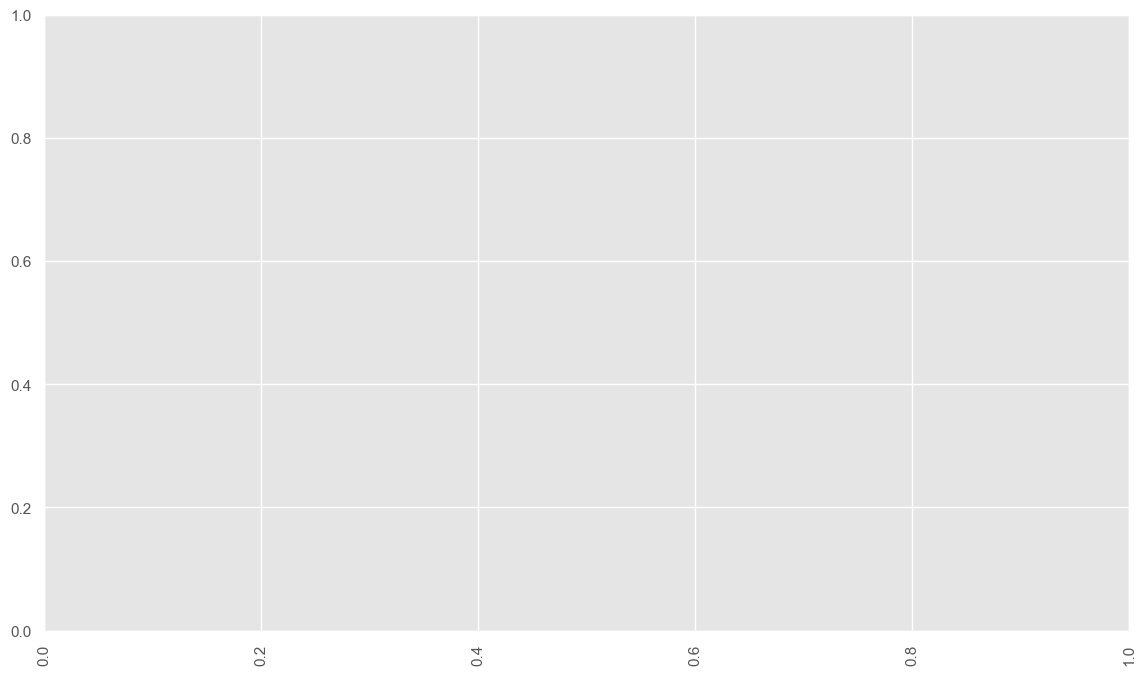

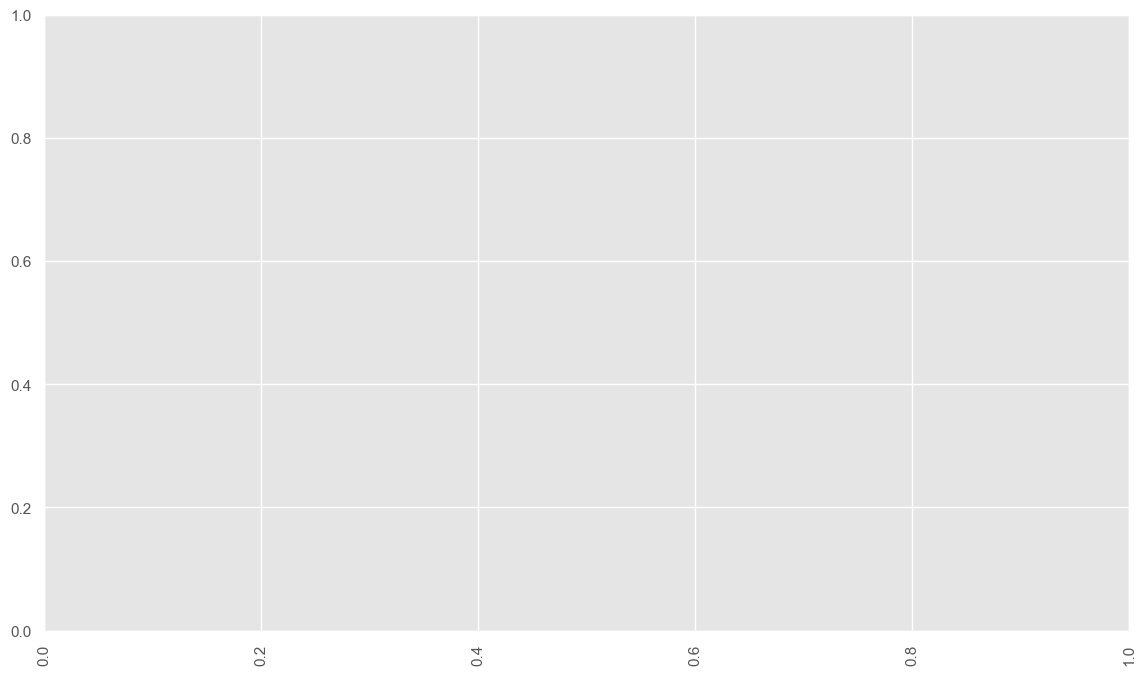

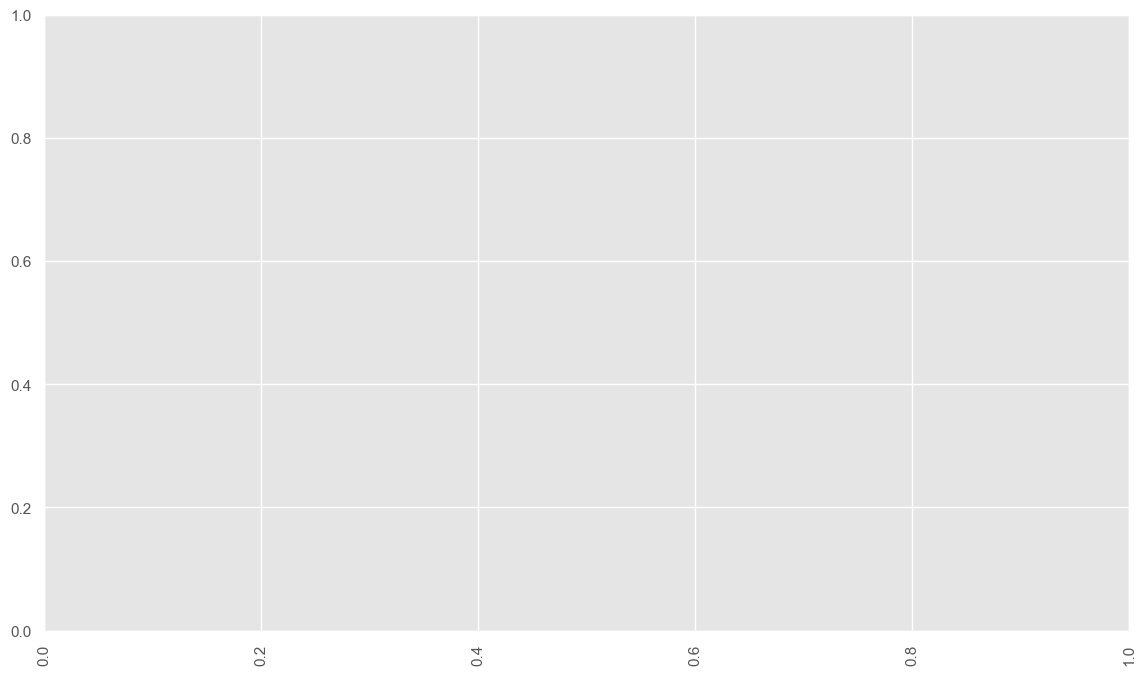

In [30]:
for i in cat.columns:
    plt.figure(figsize=(14,8))
    
    plt.xticks(rotation=90)
    plt.show()

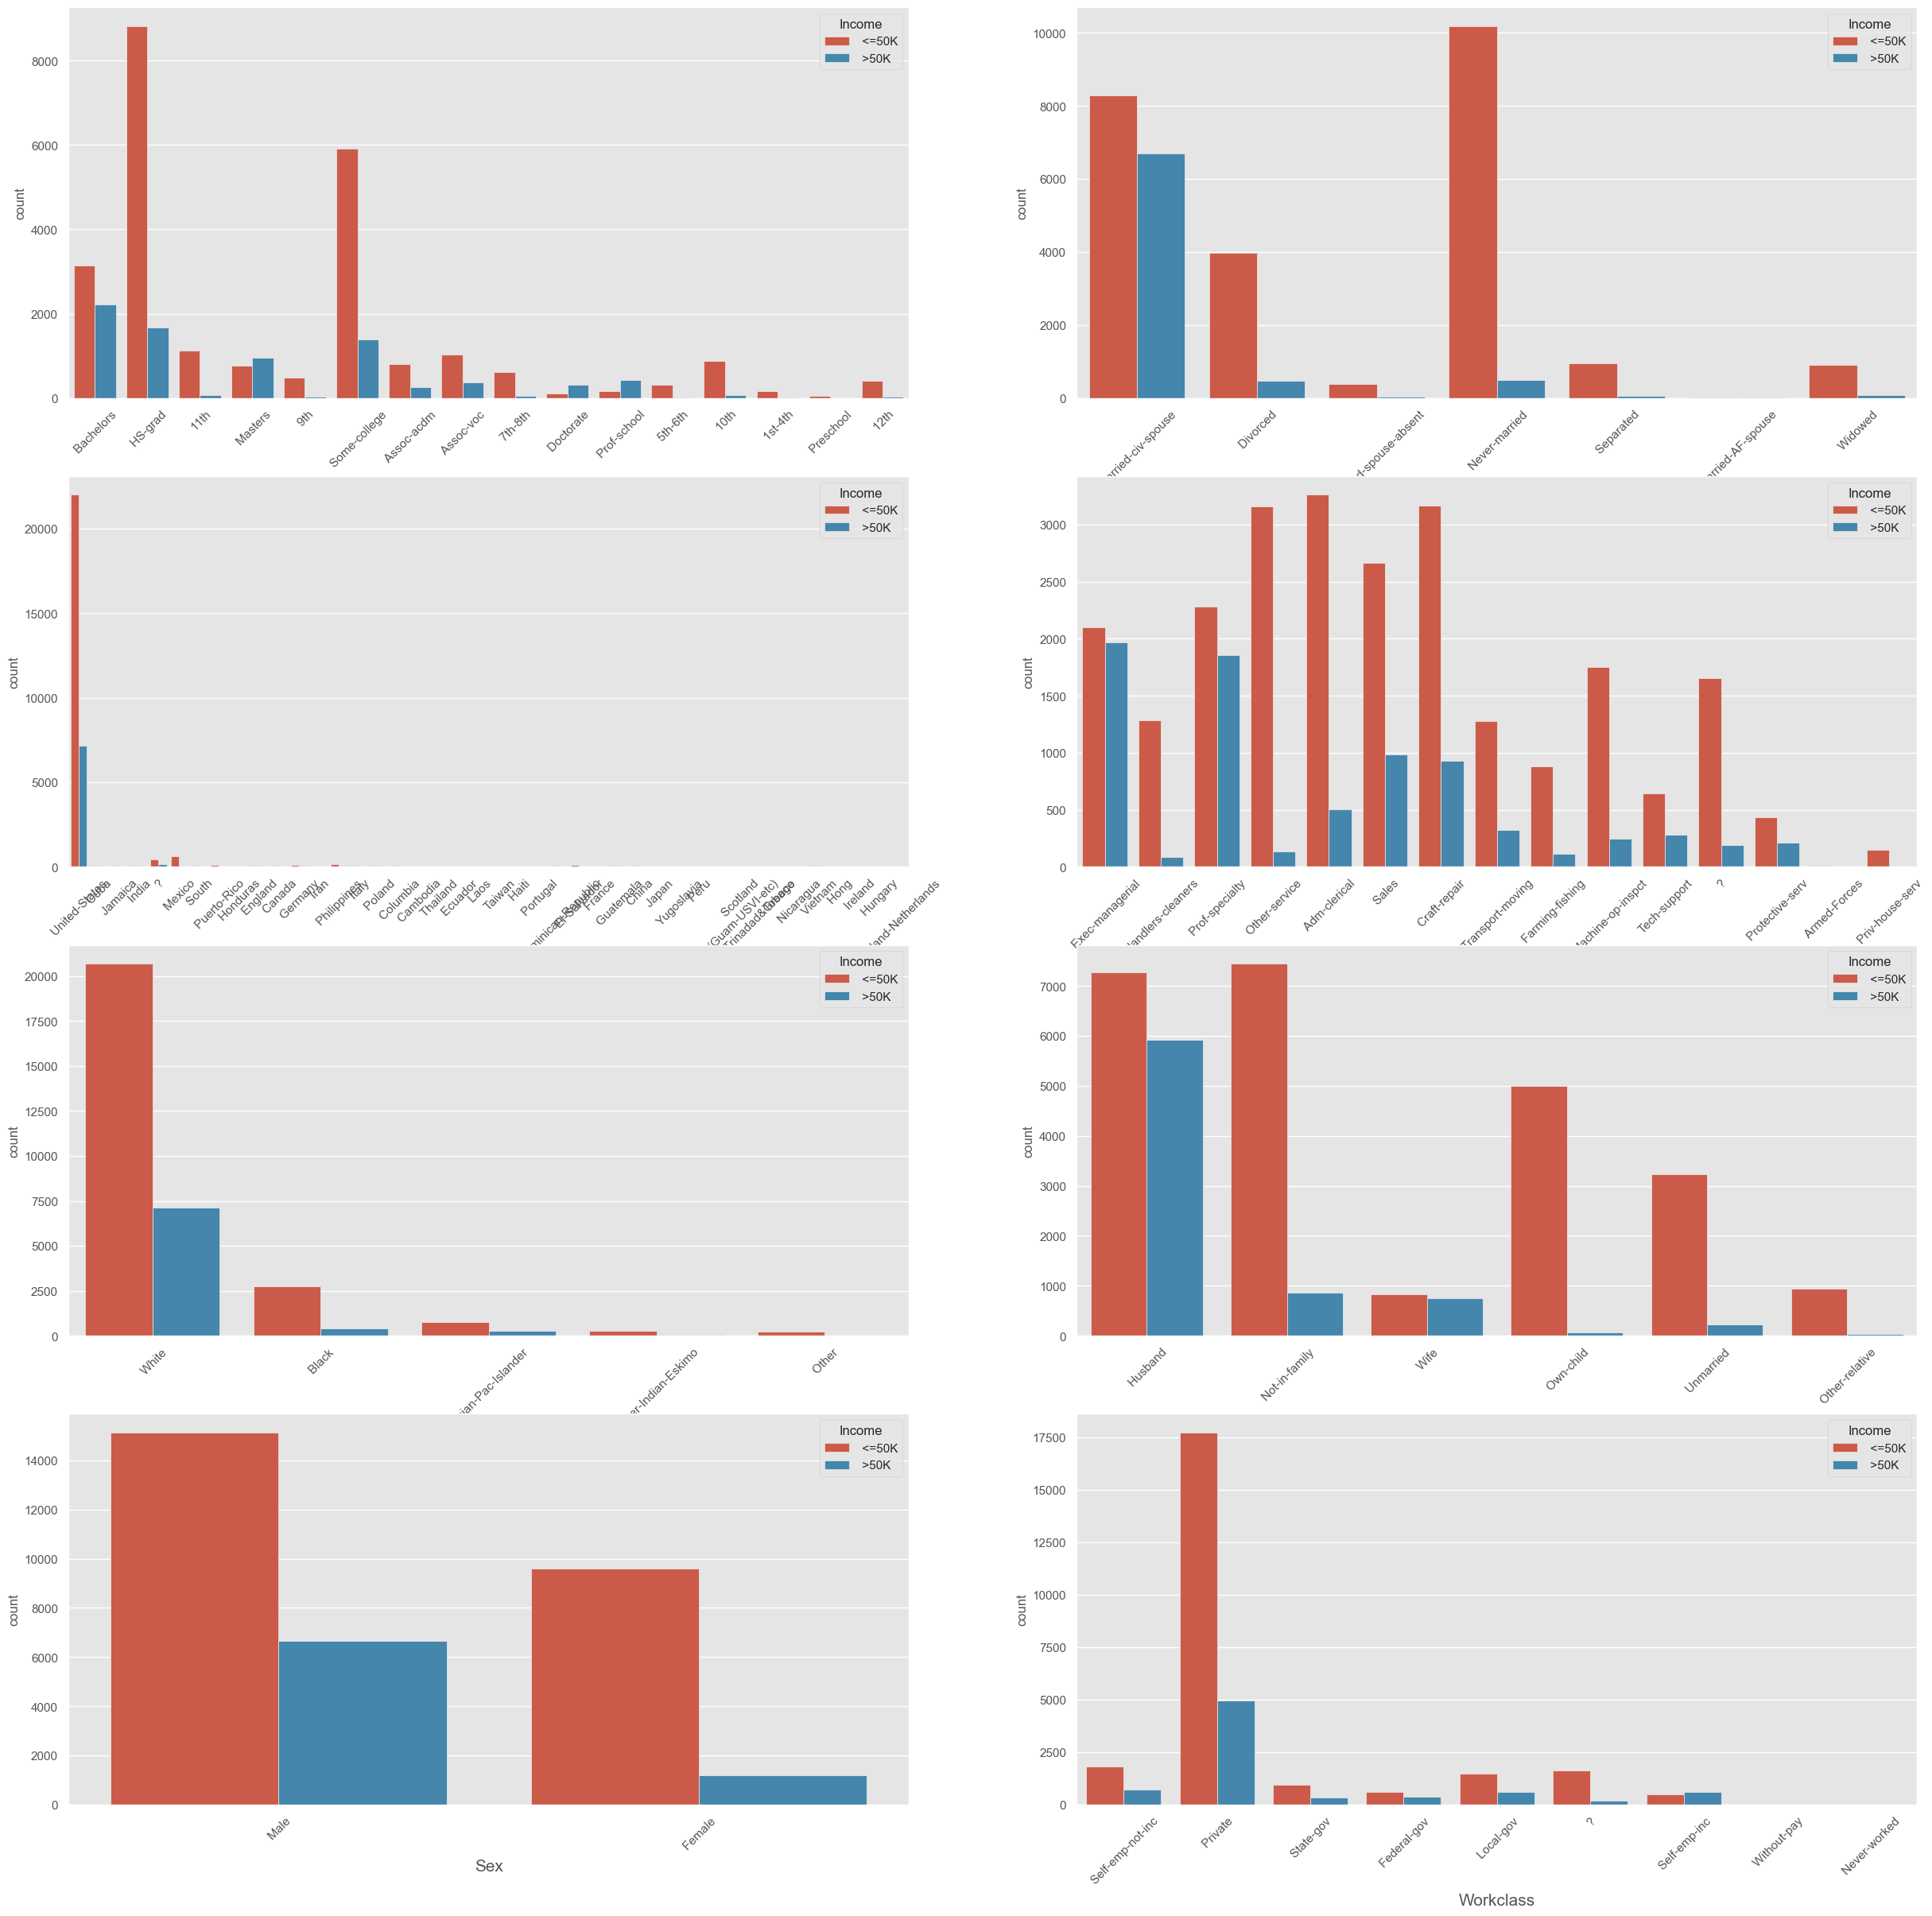

In [31]:
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1

for i in cat.columns.difference(['Income']):
    if plotnumber<=24 :
        ax = plt.subplot(8,2,plotnumber)
        sns.countplot(x=df[i],hue=df.Income)
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

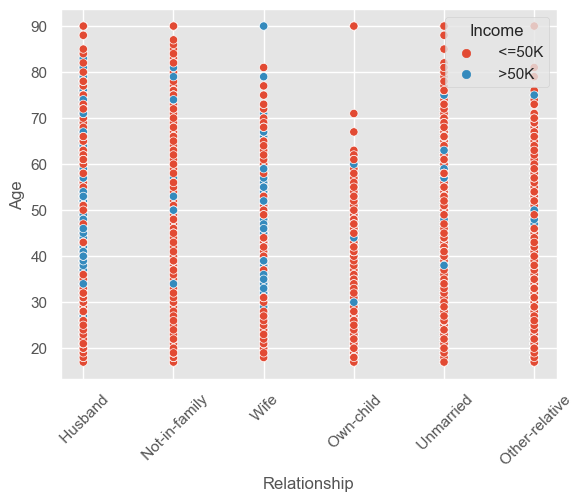

In [32]:
sns.scatterplot(x='Relationship',y='Age',hue='Income',data=df)
plt.xticks(rotation=45)
plt.show()

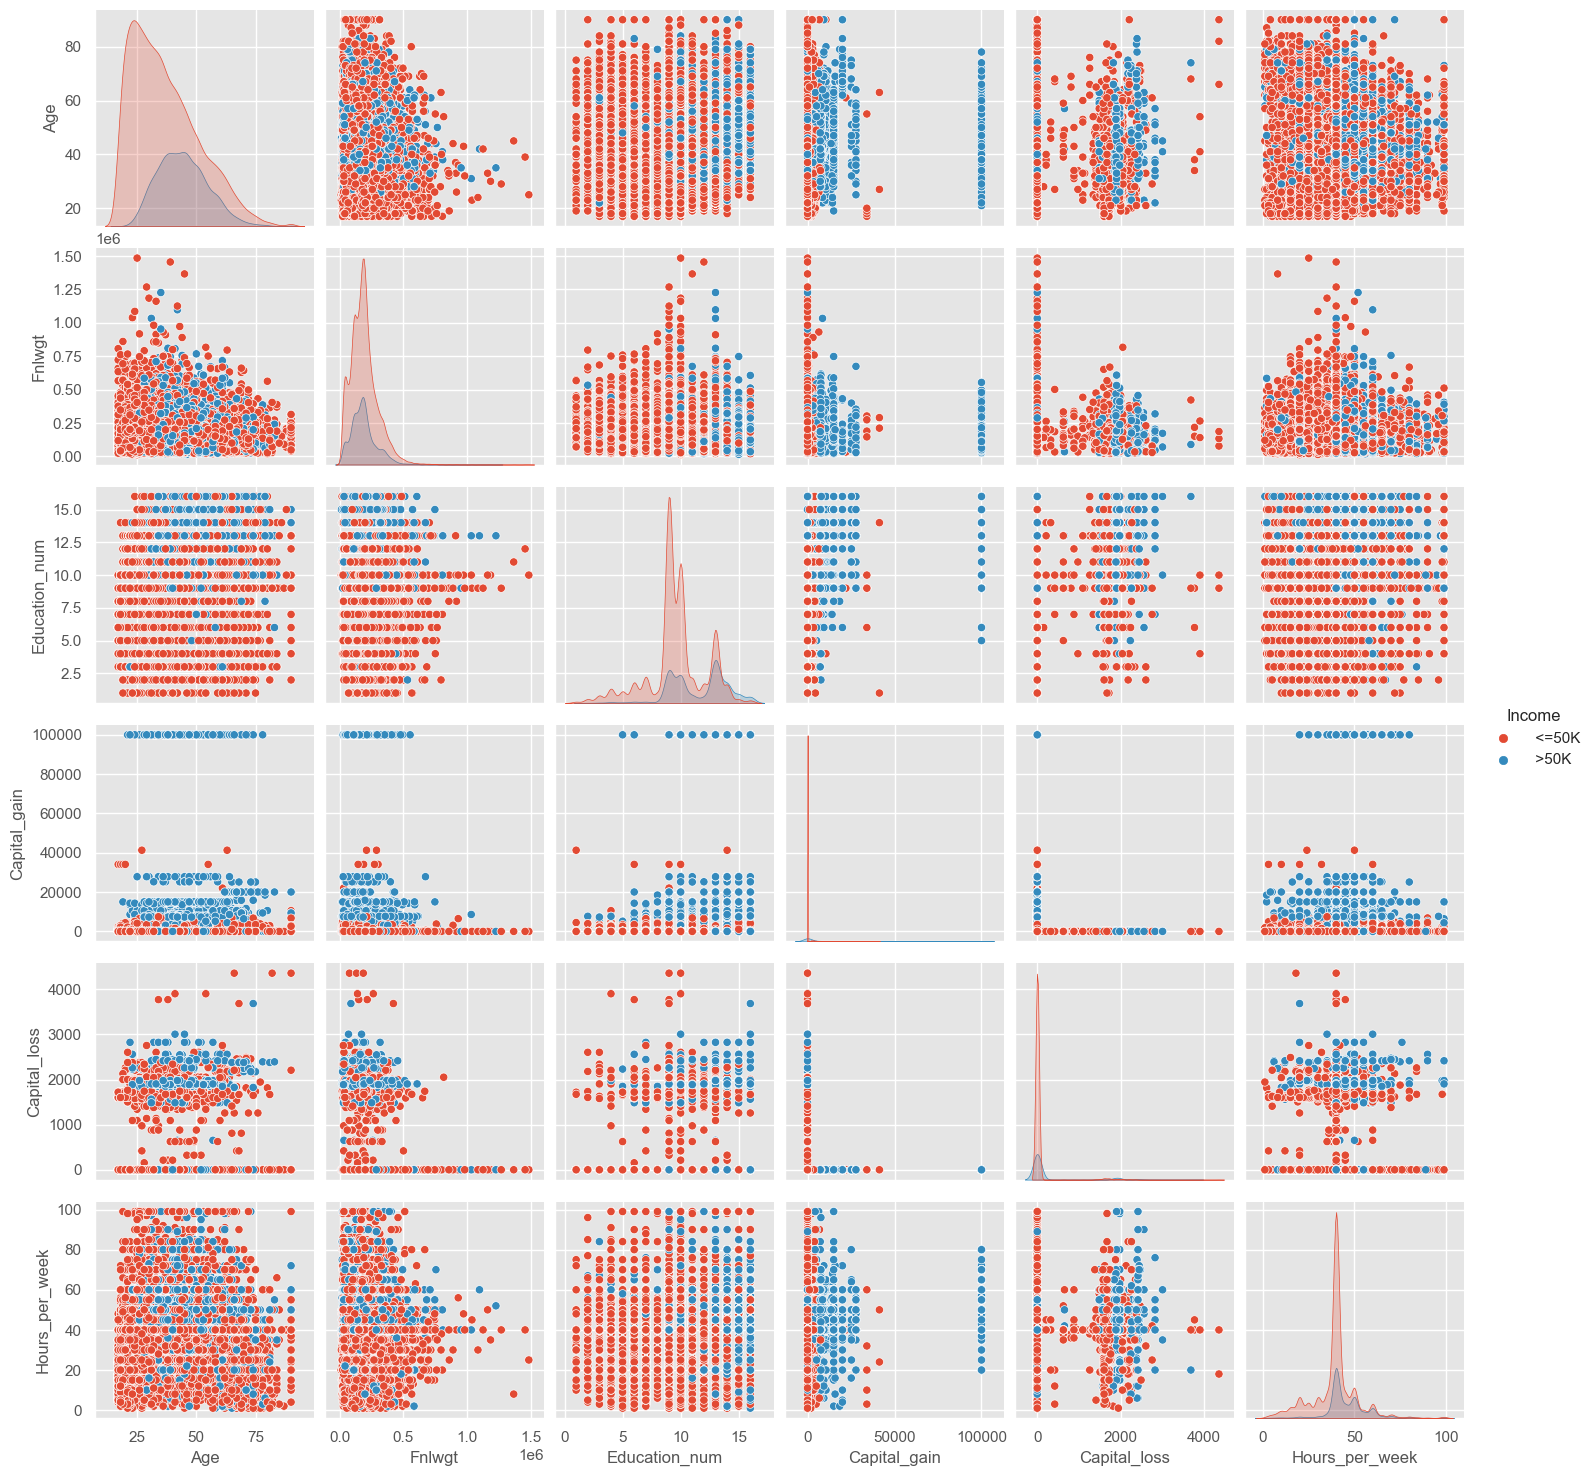

In [33]:
sns.pairplot(df,hue='Income')
plt.show()

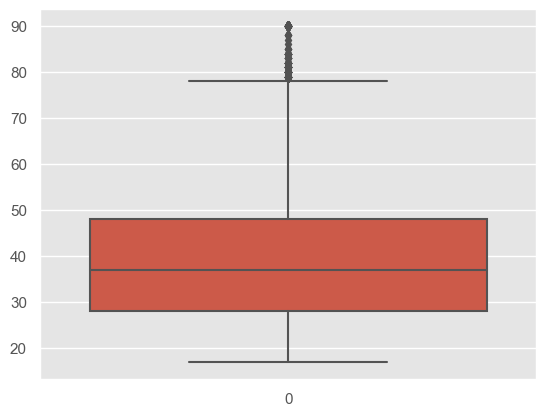

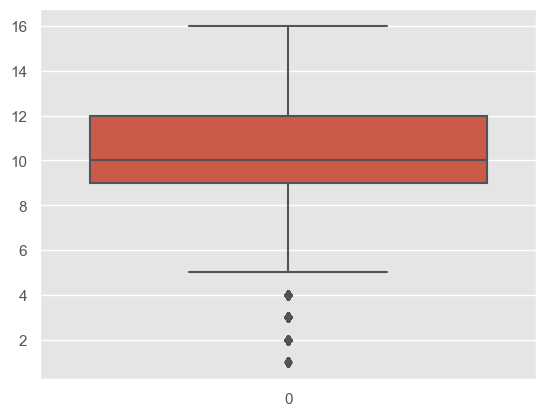

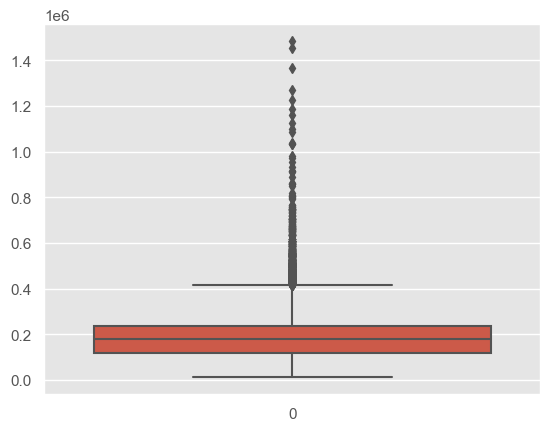

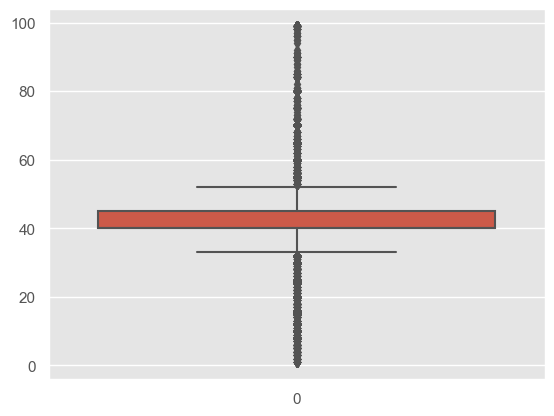

In [34]:
for col in num.columns.difference(['Capital_loss','Capital_gain']):
    sns.boxplot(df[col])
    plt.show()